About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [16]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
print("Data Length: ", len(data))

print("Data Shape: ", data.shape)

print("Data Info: ", data.info())

data.describe()

Data Length:  303
Data Shape:  (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Data Info:  None


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


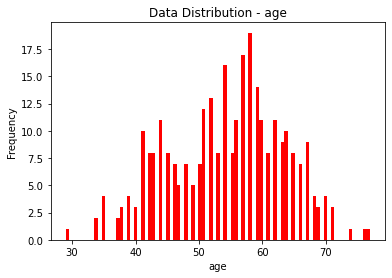

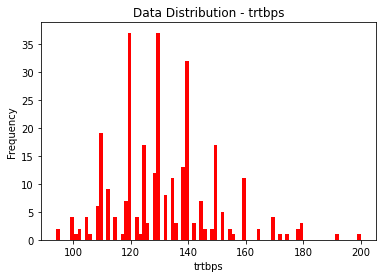

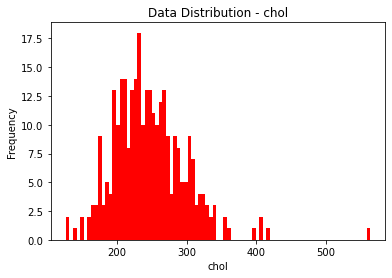

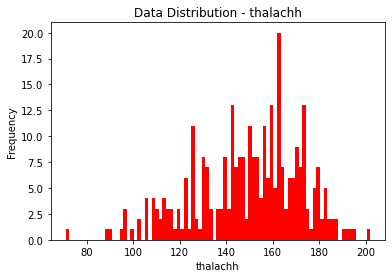

In [37]:
def plotHistogram(var):
    # girdi: degisken/sütun ismi
    # çıktı: ilgili değişkenin histogramı
    plt.figure()
    plt.hist(data[var], bins = 85, color = "red")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("Data Distribution - {}".format(var))
    plt.show()

num_var = ["age", "trtbps", "chol", "thalachh"]
for i in num_var:
    plotHistogram(i)

In [32]:
a = data["cp"].value_counts()[0]
print(a)
b = data["cp"].value_counts()[1]
print(b)
c = data["cp"].value_counts()[2]
print(c)
d = data["cp"].value_counts()[3]
print(d)

143
50
87
23


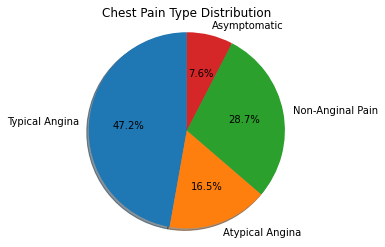

In [34]:
labels = ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]
mass = [143, 50, 87, 23]

fig1, ax1 = plt.subplots()
ax1.pie(mass, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Chest Pain Type Distribution")
plt.show()

In [38]:
a_ = data["restecg"].value_counts()[0]
print(a_)
b_ = data["restecg"].value_counts()[1]
print(b_)
c_ = data["restecg"].value_counts()[2]
print(c_)

147
152
4


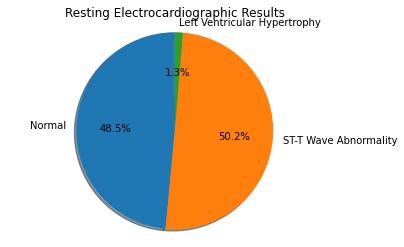

In [40]:
labels_ = ["Normal", "ST-T Wave Abnormality", "Left Ventricular Hypertrophy"]
mass_ = [147, 152, 4]

fig1, ax1 = plt.subplots()
ax1.pie(mass_, labels=labels_, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Resting Electrocardiographic Results")
plt.show()

In [43]:
# SEPERATE THE DATA SET BY GENDER
male = data[data.sex == 0]
male.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [44]:
female = data[data.sex == 1]
female.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


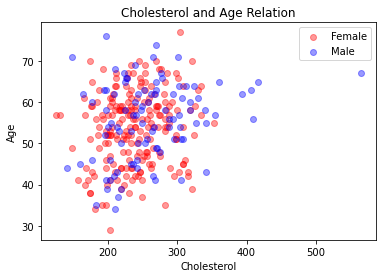

In [47]:
plt.figure()
plt.scatter(female.chol, female.age, alpha = 0.4, label = "Female", color = "red") 
plt.scatter(male.chol, male.age, alpha = 0.4, label = "Male", color = "blue")
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.title("Cholesterol and Age Relation")
plt.legend()
plt.show()

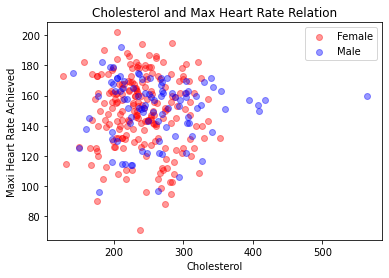

In [46]:
plt.figure()
plt.scatter(female.chol, female.thalachh, alpha = 0.4, label = "Female", color = "red") 
plt.scatter(male.chol, male.thalachh, alpha = 0.4, label = "Male", color = "blue")
plt.xlabel("Cholesterol")
plt.ylabel("Maxi Heart Rate Achieved")
plt.title("Cholesterol and Max Heart Rate Relation")
plt.legend()
plt.show()

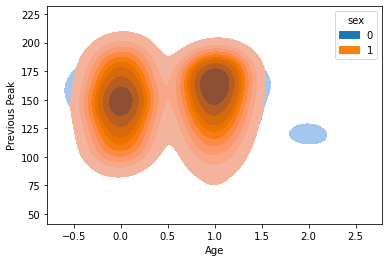

In [60]:
sns.kdeplot(data = data, x = "restecg", y = "thalachh", hue= "sex", fill = True)
plt.xlabel("Age")
plt.ylabel("Previous Peak")
plt.show()

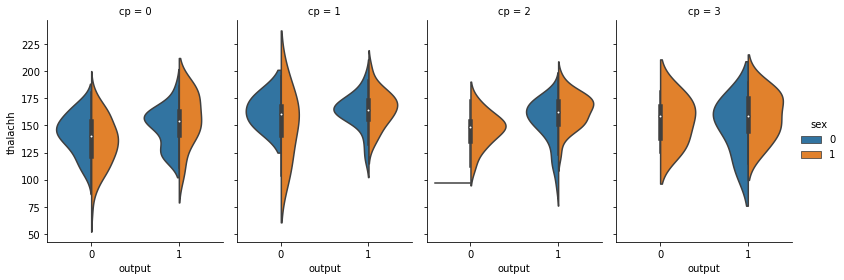

In [51]:
sns.catplot(x = "output", y = "thalachh", data = data, hue = "sex", col = "cp", kind = "violin", split = True, height = 4, aspect = 0.7)
plt.show()

<Figure size 432x288 with 0 Axes>

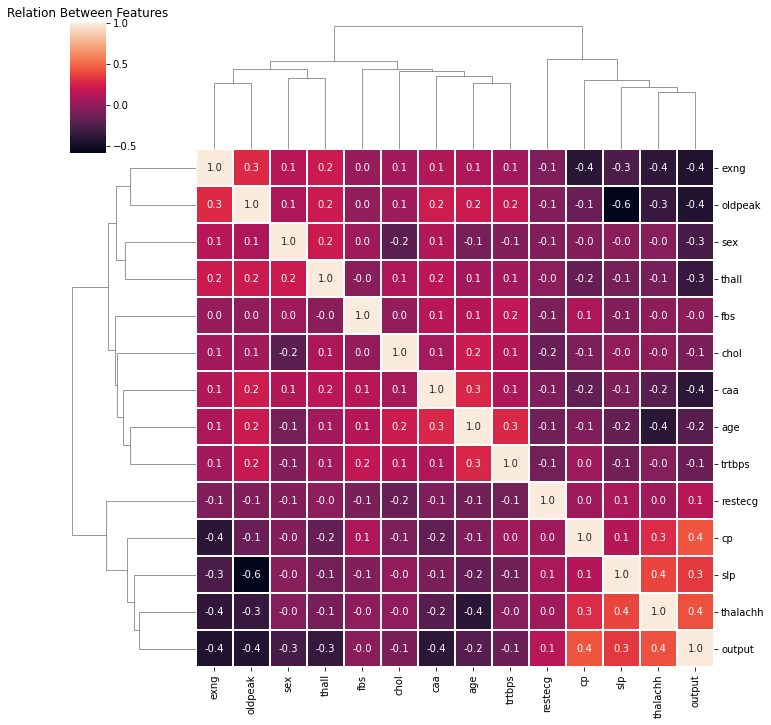

In [10]:
# the relationship between the values in the data
corr_matrix = data.corr()
plt.figure()
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths = 0.1)
plt.title("Relation Between Features")
plt.show()